# INFO 3402 – Week 07: Cat plots

[Brian C. Keegan, Ph.D.](http://brianckeegan.com/)  
[Assistant Professor, Department of Information Science](https://www.colorado.edu/cmci/people/information-science/brian-c-keegan)  
University of Colorado Boulder  

Copyright and distributed under an [MIT License](https://opensource.org/licenses/MIT)  

## Setup

In [1]:
import numpy as np
np.set_printoptions(suppress=True)

import pandas as pd
idx = pd.IndexSlice
pd.options.display.max_columns = 100

%matplotlib inline
import matplotlib.pyplot as plt

import seaborn as sb

## Background

The visualizations we used over the past two weeks showed the distribution of a single continuous variable. We also started to visualize multiple distributions using histograms and boxplots in Week 6. This week we will expand into visualizing two or more distributions of data simultaneously. We will start to use the "seaborn" ([docs](https://seaborn.pydata.org/)) library to make [`catplot`](https://seaborn.pydata.org/tutorial/categorical.html)s. There are many kinds of catplots starting with [box plots](https://seaborn.pydata.org/generated/seaborn.boxplot.html) from last week but also extending into [bar plots](https://seaborn.pydata.org/generated/seaborn.barplot.html), [point plots](https://seaborn.pydata.org/generated/seaborn.pointplot.html), [strip plots](https://seaborn.pydata.org/generated/seaborn.stripplot.html), [swarm plots](https://seaborn.pydata.org/generated/seaborn.swarmplot.html), [boxen plots](https://seaborn.pydata.org/generated/seaborn.boxenplot.html), and [violin plots](https://seaborn.pydata.org/generated/seaborn.violinplot.html). 

The central idea tying these plots together is there are two or more categories of data and you want to compare the distributions across these categories. In other words, analyzing the relationships between data that has continuous **and** categorical variables of interest.

### Refresher on statistical significant testing

In [4]:
from scipy.stats import ttest_ind

Ttest_indResult(statistic=1.6732383237077544, pvalue=0.09598892084685838)

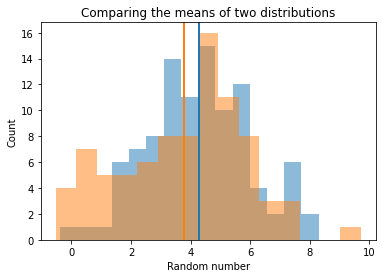

In [7]:
# Make two random distributions with different sizes, means, and standard d eviations
rand_first = np.random.normal(loc=4,scale=2,size=100)
rand_second = np.random.normal(loc=4,scale=2,size=85)

# Visualize both
f,ax = plt.subplots()
ax.hist(rand_first,bins=15,alpha=.5)
ax.hist(rand_second,bins=15,alpha=.5)

# Add vlines for their means
ax.axvline(rand_first.mean(),c='tab:blue',lw=2)
ax.axvline(rand_second.mean(),c='tab:orange',lw=2)

# Label axes!
ax.set_xlabel('Random number')
ax.set_ylabel('Count')
ax.set_title('Comparing the means of two distributions')

# Perform the t-test
ttest_ind(rand_first,rand_second)

## Expenditures by party

Let's use the standardized and cleaned [data from ProPublica](https://projects.propublica.org/represent/expenditures) for Q32021.

In [8]:
house_21q3_df = pd.read_csv('2021Q3-house-disburse-detail.csv')
house_21q3_df.head()

,BIOGUIDE_ID,OFFICE,QUARTER,PROGRAM,CATEGORY,SORT SEQUENCE,DATE,TRANSCODE,RECORDID,PAYEE,START DATE,END DATE,PURPOSE,AMOUNT,YEAR
0,NaN,2021 OFFICE OF THE SPEAKER,3,OFFICIAL EXPENSES - LEADERSHIP,SUPPLIES AND MATERIALS,DETAIL,2021-08-03,AP,1448486,CAPITOL HOST,2021-07-19,2021-07-19,FOOD & BEVERAGE,298.58,2021
1,NaN,2021 OFFICE OF THE SPEAKER,3,OFFICIAL EXPENSES - LEADERSHIP,SUPPLIES AND MATERIALS,DETAIL,2021-08-03,AP,1448487,CAPITOL HOST,2021-07-20,2021-07-20,FOOD & BEVERAGE,124.83,2021
2,NaN,2021 OFFICE OF THE SPEAKER,3,OFFICIAL EXPENSES - LEADERSHIP,SUPPLIES AND MATERIALS,DETAIL,2021-08-03,AP,1448488,CAPITOL HOST,2021-07-20,2021-07-20,FOOD & BEVERAGE,259.38,2021
3,NaN,2021 OFFICE OF THE SPEAKER,3,OFFICIAL EXPENSES - LEADERSHIP,SUPPLIES AND MATERIALS,SUBTOTAL,,,,,,,SUPPLIES AND MATERIALS TOTALS:,682.79,2021
4,NaN,2021 OFFICE OF THE SPEAKER,3,OFFICIAL EXPENSES - LEADERSHIP,SUPPLIES AND MATERIALS,SUBTOTAL,,,,,,,OFFICIAL EXPENSES - LEADERSHIP TOTALS:,682.79,2021


Filter out the rows with "SUBTOTAL" in the "SORT SEQUENCE" column and the rows with a null BIOGUIDE_ID.

In [9]:
# Define my conditions first
c0 = house_21q3_df['SORT SEQUENCE'] == 'DETAIL'
c1 = house_21q3_df['BIOGUIDE_ID'].notnull()

# Then pass to boolean index
house_21q3_clean_df = house_21q3_df[c0 & c1]

house_21q3_clean_df.head()

,BIOGUIDE_ID,OFFICE,QUARTER,PROGRAM,CATEGORY,SORT SEQUENCE,DATE,TRANSCODE,RECORDID,PAYEE,START DATE,END DATE,PURPOSE,AMOUNT,YEAR
7126,A000370,2021 HON. ALMA S. ADAMS,3,OFFICIAL EXPENSES OF MEMBERS,FRANKED MAIL,DETAIL,2021-07-31,GL,FLG0108342,,2021-07-20,2021-07-31,FRANKED MAIL,-22.20,2021
7127,A000370,2021 HON. ALMA S. ADAMS,3,OFFICIAL EXPENSES OF MEMBERS,FRANKED MAIL,DETAIL,2021-08-10,AP,1448678,UNITED STATES POSTAL SERVICE,2021-06-01,2021-06-30,FRANKED MAIL,346.61,2021
7128,A000370,2021 HON. ALMA S. ADAMS,3,OFFICIAL EXPENSES OF MEMBERS,FRANKED MAIL,DETAIL,2021-09-01,AP,1460065,UNITED STATES POSTAL SERVICE,2021-07-01,2021-07-31,FRANKED MAIL,31.89,2021
7129,A000370,2021 HON. ALMA S. ADAMS,3,OFFICIAL EXPENSES OF MEMBERS,FRANKED MAIL,DETAIL,2021-09-28,AP,1470892,UNITED STATES POSTAL SERVICE,2021-08-01,2021-08-31,FRANKED MAIL,24.05,2021
7130,A000370,2021 HON. ALMA S. ADAMS,3,OFFICIAL EXPENSES OF MEMBERS,FRANKED MAIL,DETAIL,2021-09-30,GL,FLG0109986,,2021-09-20,2021-09-30,FRANKED MAIL,-10.10,2021


Load the "house_members.csv" data (see Appendix for details if you care).

In [10]:
members_df = pd.read_csv('house_members.csv')

members_df.head()

,namelist,bioguideID,lastname,firstname,middlename,sort-name,suffix,courtesy,prior-congress,official-name,formal-name,party,caucus,state,district,townname,office-building,office-room,office-zip,office-zip-suffix,phone,elected-date,sworn-date,footnote-ref,footnote,postal-code,state-fullname,statedistrict
0,"Young, Don",Y000033,Young,Don,NaN,"YOUNG,DON",NaN,Mr.,116,Don Young,Mr. Young,R,R,NaN,At Large,Fort Yukon,RHOB,2314,20515,200,(202) 225-5765,"November 3, 2020","January 3, 2021",NaN,NaN,AK,Alaska,AK00
1,"Carl, Jerry",C001054,Carl,Jerry,L.,"CARL,JERRY",NaN,Mr.,0,Jerry L. Carl,Mr. Carl,R,R,NaN,1st,Mobile,LHOB,1330,20515,101,(202) 225-4931,"November 3, 2020","January 3, 2021",NaN,NaN,AL,Alabama,AL01
2,"Moore, Barry",M001212,Moore,Barry,NaN,"MOORE,BARRY",NaN,Mr.,0,Barry Moore,Mr. Moore of Alabama,R,R,NaN,2nd,Enterprise,LHOB,1504,20515,102,(202) 225-2901,"November 3, 2020","January 3, 2021",NaN,NaN,AL,Alabama,AL02
3,"Rogers, Mike",R000575,Rogers,Mike,NaN,"ROGERS,MIKE",NaN,Mr.,116,Mike Rogers,Mr. Rogers of Alabama,R,R,NaN,3rd,Anniston,RHOB,2469,20515,103,(202) 225-3261,"November 3, 2020","January 3, 2021",NaN,NaN,AL,Alabama,AL03
4,"Aderholt, Robert",A000055,Aderholt,Robert,B.,"ADERHOLT,ROBERT",NaN,Mr.,116,Robert B. Aderholt,Mr. Aderholt,R,R,NaN,4th,Haleyville,CHOB,266,20515,104,(202) 225-4876,"November 3, 2020","January 3, 2021",NaN,NaN,AL,Alabama,AL04


### Exercise 01: Join data

Join the members DataFrame on the cleaned disbursement data. Report out the shapes of the input and joined/merged DataFrame.

In [11]:
joined_df = pd.merge(
    left = house_21q3_clean_df,
    right = members_df,
    left_on = 'BIOGUIDE_ID',
    right_on = 'bioguideID',
    how = 'inner'
)

In [12]:
house_21q3_clean_df.shape, members_df.shape, joined_df.shape


((78559, 15), (441, 28), (77270, 43))

In [16]:
joined_df.head()

,BIOGUIDE_ID,OFFICE,QUARTER,PROGRAM,CATEGORY,SORT SEQUENCE,DATE,TRANSCODE,RECORDID,PAYEE,START DATE,END DATE,PURPOSE,AMOUNT,YEAR,namelist,bioguideID,lastname,firstname,middlename,sort-name,suffix,courtesy,prior-congress,official-name,formal-name,party,caucus,state,district,townname,office-building,office-room,office-zip,office-zip-suffix,phone,elected-date,sworn-date,footnote-ref,footnote,postal-code,state-fullname,statedistrict
0,A000370,2021 HON. ALMA S. ADAMS,3,OFFICIAL EXPENSES OF MEMBERS,FRANKED MAIL,DETAIL,2021-07-31,GL,FLG0108342,,2021-07-20,2021-07-31,FRANKED MAIL,-22.20,2021,"Adams, Alma",A000370,Adams,Alma,S.,"ADAMS,ALMA",NaN,Ms.,116,Alma S. Adams,Ms. Adams,D,D,NaN,12th,Charlotte,RHOB,2436,20515,3312,(202) 225-1510,"November 3, 2020","January 3, 2021",NaN,NaN,NC,North Carolina,NC12
1,A000370,2021 HON. ALMA S. ADAMS,3,OFFICIAL EXPENSES OF MEMBERS,FRANKED MAIL,DETAIL,2021-08-10,AP,1448678,UNITED STATES POSTAL SERVICE,2021-06-01,2021-06-30,FRANKED MAIL,346.61,2021,"Adams, Alma",A000370,Adams,Alma,S.,"ADAMS,ALMA",NaN,Ms.,116,Alma S. Adams,Ms. Adams,D,D,NaN,12th,Charlotte,RHOB,2436,20515,3312,(202) 225-1510,"November 3, 2020","January 3, 2021",NaN,NaN,NC,North Carolina,NC12
2,A000370,2021 HON. ALMA S. ADAMS,3,OFFICIAL EXPENSES OF MEMBERS,FRANKED MAIL,DETAIL,2021-09-01,AP,1460065,UNITED STATES POSTAL SERVICE,2021-07-01,2021-07-31,FRANKED MAIL,31.89,2021,"Adams, Alma",A000370,Adams,Alma,S.,"ADAMS,ALMA",NaN,Ms.,116,Alma S. Adams,Ms. Adams,D,D,NaN,12th,Charlotte,RHOB,2436,20515,3312,(202) 225-1510,"November 3, 2020","January 3, 2021",NaN,NaN,NC,North Carolina,NC12
3,A000370,2021 HON. ALMA S. ADAMS,3,OFFICIAL EXPENSES OF MEMBERS,FRANKED MAIL,DETAIL,2021-09-28,AP,1470892,UNITED STATES POSTAL SERVICE,2021-08-01,2021-08-31,FRANKED MAIL,24.05,2021,"Adams, Alma",A000370,Adams,Alma,S.,"ADAMS,ALMA",NaN,Ms.,116,Alma S. Adams,Ms. Adams,D,D,NaN,12th,Charlotte,RHOB,2436,20515,3312,(202) 225-1510,"November 3, 2020","January 3, 2021",NaN,NaN,NC,North Carolina,NC12
4,A000370,2021 HON. ALMA S. ADAMS,3,OFFICIAL EXPENSES OF MEMBERS,FRANKED MAIL,DETAIL,2021-09-30,GL,FLG0109986,,2021-09-20,2021-09-30,FRANKED MAIL,-10.10,2021,"Adams, Alma",A000370,Adams,Alma,S.,"ADAMS,ALMA",NaN,Ms.,116,Alma S. Adams,Ms. Adams,D,D,NaN,12th,Charlotte,RHOB,2436,20515,3312,(202) 225-1510,"November 3, 2020","January 3, 2021",NaN,NaN,NC,North Carolina,NC12


### Exercise 02: Top-spending state delegations

Create a table of the top 10 state delegations with the highest spending.

In [20]:
agg_d = {'AMOUNT':'sum','BIOGUIDE_ID':'nunique'}
delegation_spending = joined_df.groupby('state-fullname').agg(agg_d)
delegation_spending.sort_values('AMOUNT',ascending=False)
per_delegate_spending = delegation_spending['AMOUNT']/delegation_spending['BIOGUIDE_ID']
per_delegate_spending.sort_values(ascending=False)

state-fullname
Wyoming                     411153.140000
Puerto Rico                 407842.940000
Montana                     405826.910000
Northern Mariana Islands    386064.370000
Idaho                       382242.450000
North Dakota                379608.060000
Guam                        371103.060000
New Hampshire               361590.880000
Maine                       359625.215000
Iowa                        355639.935000
Missouri                    351998.131250
Nevada                      349890.472500
Kansas                      349400.265000
Oregon                      348907.886000
Massachusetts               345636.307778
Alabama                     343967.528571
Connecticut                 343020.134000
Minnesota                   341009.158750
Oklahoma                    337615.074000
Arkansas                    337443.380000
Colorado                    334200.060000
Arizona                     331792.246667
Nebraska                    330701.966667
Texas              

### Catplot spending by party

Use seaborn's `catplot` function to make side-by-side bar plots (`kind='bar'`) of the average amount spent per legislator by party. The black lines at the top are the 95% confidence interval: 95% of the values appear in this range.

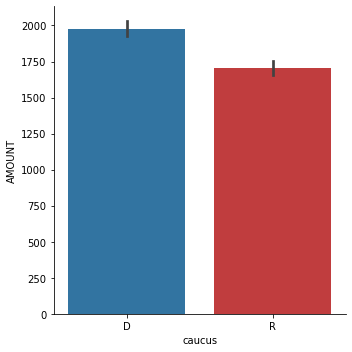

In [22]:
sb.catplot(
    data = joined_df,
    x = 'caucus',
    y = 'AMOUNT',
    kind = 'bar',
    palette = ['tab:blue','tab:red']
)

Note that this is the average transaction (DETAIL), not necessarily the average spending by office. To do the latter, we need to compute office-level (rather than DETAIL-level) statistics.

In [23]:
total_spending = joined_df.groupby('BIOGUIDE_ID').agg({'AMOUNT':'sum'})

spending_joined = pd.merge(
    left = total_spending.reset_index(),
    right = members_df,
    left_on = 'BIOGUIDE_ID',
    right_on = 'bioguideID',
    how = 'left'
)

spending_joined

,BIOGUIDE_ID,AMOUNT,namelist,bioguideID,lastname,firstname,middlename,sort-name,suffix,courtesy,prior-congress,official-name,formal-name,party,caucus,state,district,townname,office-building,office-room,office-zip,office-zip-suffix,phone,elected-date,sworn-date,footnote-ref,footnote,postal-code,state-fullname,statedistrict
0,A000055,332523.95,"Aderholt, Robert",A000055,Aderholt,Robert,B.,"ADERHOLT,ROBERT",NaN,Mr.,116,Robert B. Aderholt,Mr. Aderholt,R,R,NaN,4th,Haleyville,CHOB,266,20515,104,(202) 225-4876,"November 3, 2020","January 3, 2021",NaN,NaN,AL,Alabama,AL04
1,A000148,299968.98,"Auchincloss, Jake",A000148,Auchincloss,Jake,NaN,"AUCHINCLOSS,JAKE",NaN,Mr.,0,Jake Auchincloss,Mr. Auchincloss,D,D,NaN,4th,Newton,LHOB,1524,20515,2104,(202) 225-5931,"November 3, 2020","January 3, 2021",NaN,NaN,MA,Massachusetts,MA04
2,A000369,275509.57,"Amodei, Mark",A000369,Amodei,Mark,E.,"AMODEI,MARK",NaN,Mr.,116,Mark E. Amodei,Mr. Amodei,R,R,NaN,2nd,Carson City,CHOB,104,20515,2802,(202) 225-6155,"November 3, 2020","January 3, 2021",NaN,NaN,NV,Nevada,NV02
3,A000370,311832.30,"Adams, Alma",A000370,Adams,Alma,S.,"ADAMS,ALMA",NaN,Ms.,116,Alma S. Adams,Ms. Adams,D,D,NaN,12th,Charlotte,RHOB,2436,20515,3312,(202) 225-1510,"November 3, 2020","January 3, 2021",NaN,NaN,NC,North Carolina,NC12
4,A000371,314503.94,"Aguilar, Pete",A000371,Aguilar,Pete,NaN,"AGUILAR,PETE",NaN,Mr.,116,Pete Aguilar,Mr. Aguilar,D,D,NaN,31st,Redlands,CHOB,109,20515,531,(202) 225-3201,"November 3, 2020","January 3, 2021",NaN,NaN,CA,California,CA31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
428,W000825,310593.50,"Wexton, Jennifer",W000825,Wexton,Jennifer,NaN,"WEXTON,JENNIFER",NaN,Ms.,116,Jennifer Wexton,Ms. Wexton,D,D,NaN,10th,Leesburg,LHOB,1217,20515,4610,(202) 225-5136,"November 3, 2020","January 3, 2021",NaN,NaN,VA,Virginia,VA10
429,W000826,305119.34,"Wild, Susan",W000826,Wild,Susan,NaN,"WILD,SUSAN",NaN,Ms.,116,Susan Wild,Ms. Wild,D,D,NaN,7th,Allentown,LHOB,1027,20515,3807,(202) 225-6411,"November 3, 2020","January 3, 2021",NaN,NaN,PA,Pennsylvania,PA07
430,Y000033,323914.61,"Young, Don",Y000033,Young,Don,NaN,"YOUNG,DON",NaN,Mr.,116,Don Young,Mr. Young,R,R,NaN,At Large,Fort Yukon,RHOB,2314,20515,200,(202) 225-5765,"November 3, 2020","January 3, 2021",NaN,NaN,AK,Alaska,AK00
431,Y000062,323923.51,"Yarmuth, John",Y000062,Yarmuth,John,A.,"YARMUTH,JOHN",NaN,Mr.,116,John A. Yarmuth,Mr. Yarmuth,D,D,NaN,3rd,Louisville,CHOB,402,20515,1703,(202) 225-5401,"November 3, 2020","January 3, 2021",NaN,NaN,KY,Kentucky,KY03


In [24]:
spending_joined.loc[spending_joined['namelist'].str.contains('Neguse')]

,BIOGUIDE_ID,AMOUNT,namelist,bioguideID,lastname,firstname,middlename,sort-name,suffix,courtesy,prior-congress,official-name,formal-name,party,caucus,state,district,townname,office-building,office-room,office-zip,office-zip-suffix,phone,elected-date,sworn-date,footnote-ref,footnote,postal-code,state-fullname,statedistrict
294,N000191,333264.98,"Neguse, Joe",N000191,Neguse,Joe,NaN,"NEGUSE,JOE",NaN,Mr.,116,Joe Neguse,Mr. Neguse,D,D,NaN,2nd,Lafayette,LHOB,1419,20515,602,(202) 225-2161,"November 3, 2020","January 3, 2021",NaN,NaN,CO,Colorado,CO02


You can swap some of these parameters to get a different orientation.

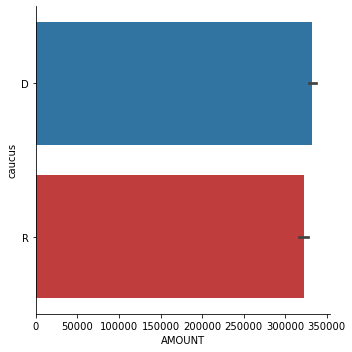

In [26]:
sb.catplot(
    data = spending_joined,
    x = 'AMOUNT',
    y = 'caucus',
    kind = 'bar',
    order = ['D','R'],
    palette = ['tab:blue','tab:red']
)

These may be easier to see as a box plot.

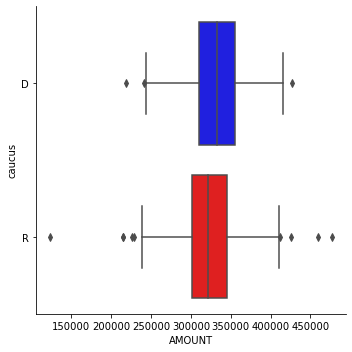

In [27]:
g = sb.catplot(
    data = spending_joined,
    x = 'AMOUNT',
    y = 'caucus',
    kind = 'box',
    order = ['D','R'],
    palette = ['blue','red']
)

This is average spending across legislators. We can use a different "estimator" to get their median or total spending.

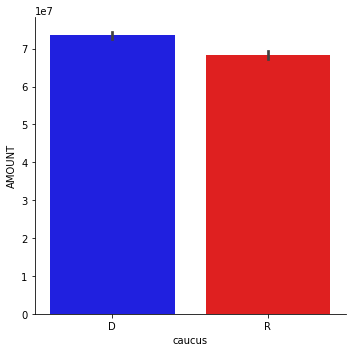

In [30]:
sb.catplot(
    data = spending_joined,
    x = 'caucus',
    y = 'AMOUNT',
    kind = 'bar',
    estimator = np.sum,
    order = ['D','R'],
    palette = sb.color_palette(['blue','red'])
)

Does this spending vary meaningfully by office building?

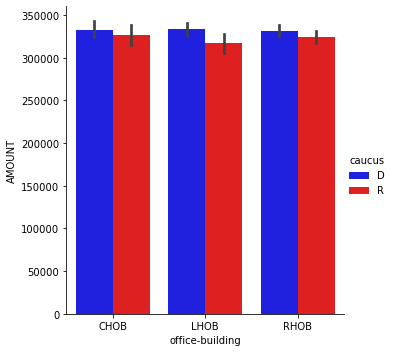

In [31]:
sb.catplot(
    data = spending_joined,
    x = 'office-building',
    y = 'AMOUNT',
    hue = 'caucus',
    kind = 'bar',
    estimator = np.mean,
    hue_order = ['D','R'],
    palette = sb.color_palette(['blue','red'])
)

### Are these differences statistically significant?

We have two independent samples and want to test the null hypothesis that the averages of these distributions are identical. We use a two-side independent t-test, or [`ttest_ind`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html) from `scipy.stats`.

In [32]:
from scipy.stats import ttest_ind

First test that the *transaction-level* spending differences are statistically significant.

In [33]:
dem_transactions = joined_df.loc[joined_df['caucus'] == 'D','AMOUNT']
rep_transactions = joined_df.loc[joined_df['caucus'] == 'R','AMOUNT']

dem_transactions

0         -22.20
1         346.61
2          31.89
3          24.05
4         -10.10
          ...   
76853     298.00
76854     298.00
76855    1520.00
76856     -31.00
76857     783.24
Name: AMOUNT, Length: 37168, dtype: float64

In [34]:
ttest_ind(dem_transactions,rep_transactions)

Ttest_indResult(statistic=7.440480140468049, pvalue=1.013552620041707e-13)

Then test if the *legislator-level* spending differences are statistically significant.

In [35]:
dem_office = spending_joined.loc[spending_joined['caucus'] == 'D','AMOUNT']
rep_office = spending_joined.loc[spending_joined['caucus'] == 'R','AMOUNT']

ttest_ind(dem_office,rep_office)

Ttest_indResult(statistic=2.84971477671957, pvalue=0.004585663443262788)

### Execise 03: Try out alternative catplots

Use catplot to make a point plot, strip plot, violin plot, or some other categorical plot.

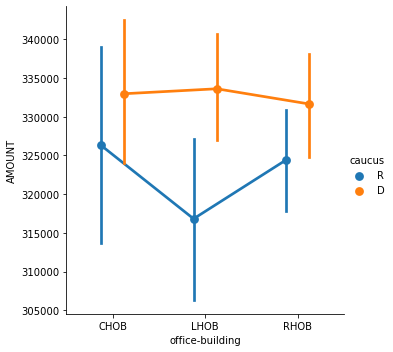

In [52]:
sb.catplot(
    data = spending_joined,
    x = 'office-building',
    y = 'AMOUNT',
    hue = 'caucus',
    kind = 'point',
    dodge = .25
)

### Exercise 04: Try out other categories as ticks and hues

The "prior-congress" column indicates whether the member is an incumbent (held thir or a similar office previously) or a newcomer. If they are an incumbent, their number will reflect their previous Congress. If they are not an incumbent, it will be a 0.

Make a new column "incumbent" that is a Boolean for whether or not "prior-congress" is *not* 0.

In [53]:
spending_joined.head()

,BIOGUIDE_ID,AMOUNT,namelist,bioguideID,lastname,firstname,middlename,sort-name,suffix,courtesy,prior-congress,official-name,formal-name,party,caucus,state,district,townname,office-building,office-room,office-zip,office-zip-suffix,phone,elected-date,sworn-date,footnote-ref,footnote,postal-code,state-fullname,statedistrict
0,A000055,332523.95,"Aderholt, Robert",A000055,Aderholt,Robert,B.,"ADERHOLT,ROBERT",NaN,Mr.,116,Robert B. Aderholt,Mr. Aderholt,R,R,NaN,4th,Haleyville,CHOB,266,20515,104,(202) 225-4876,"November 3, 2020","January 3, 2021",NaN,NaN,AL,Alabama,AL04
1,A000148,299968.98,"Auchincloss, Jake",A000148,Auchincloss,Jake,NaN,"AUCHINCLOSS,JAKE",NaN,Mr.,0,Jake Auchincloss,Mr. Auchincloss,D,D,NaN,4th,Newton,LHOB,1524,20515,2104,(202) 225-5931,"November 3, 2020","January 3, 2021",NaN,NaN,MA,Massachusetts,MA04
2,A000369,275509.57,"Amodei, Mark",A000369,Amodei,Mark,E.,"AMODEI,MARK",NaN,Mr.,116,Mark E. Amodei,Mr. Amodei,R,R,NaN,2nd,Carson City,CHOB,104,20515,2802,(202) 225-6155,"November 3, 2020","January 3, 2021",NaN,NaN,NV,Nevada,NV02
3,A000370,311832.30,"Adams, Alma",A000370,Adams,Alma,S.,"ADAMS,ALMA",NaN,Ms.,116,Alma S. Adams,Ms. Adams,D,D,NaN,12th,Charlotte,RHOB,2436,20515,3312,(202) 225-1510,"November 3, 2020","January 3, 2021",NaN,NaN,NC,North Carolina,NC12
4,A000371,314503.94,"Aguilar, Pete",A000371,Aguilar,Pete,NaN,"AGUILAR,PETE",NaN,Mr.,116,Pete Aguilar,Mr. Aguilar,D,D,NaN,31st,Redlands,CHOB,109,20515,531,(202) 225-3201,"November 3, 2020","January 3, 2021",NaN,NaN,CA,California,CA31


In [54]:
spending_joined['prior-congress'].value_counts()

116    369
0       59
115      4
105      1
Name: prior-congress, dtype: int64

In [56]:
spending_joined['incumbent'] = spending_joined['prior-congress'] != 0

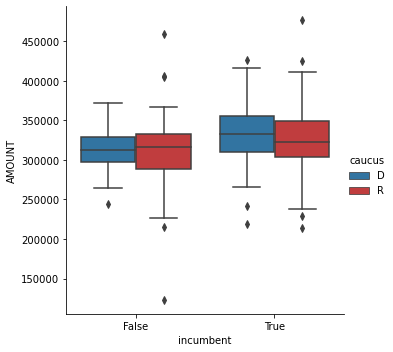

In [63]:
sb.catplot(
    data = spending_joined,
    x = 'incumbent',
    y = 'AMOUNT',
    hue = 'caucus',
    kind = 'box',
    hue_order = ['D','R'],
    palette = ['tab:blue','tab:red']
)

## Country military data

The World Bank's [World Development Indicators](https://databank.worldbank.org/source/world-development-indicators#) database has 1,443 different kinds of data about 266 countries going back several decades. I've extracted data about countries' military expenditures, armed forces size, and arms imports and exports and shared it with you as "country_military.csv". There is also "denominator data" on the labor force and GDP if we wanted to convert the percentages to absolute numbers. There are ".." values that represent NaNs, make sure to pass this to a parameter in `read_csv`.

In [65]:
military_df = pd.read_csv('country_military.csv',na_values='..')

military_df.head(1)

,Country Name,Country Code,Series Name,Series Code,2010 [YR2010],2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020]
0,Afghanistan,AFG,Military expenditure (% of GDP),MS.MIL.XPND.GD.ZS,1.945836,1.821345,1.175416,1.07695,1.298013,0.994576,0.956772,0.945227,1.006746,1.118231,1.369684


### Exercise 05: Clean and melt this data

Clean this data so the columns and series names are more interpetable. You can probably drop the "Series Code" column. Pivot and melt the data so that what started as the "Series Name" column are value columns and "Country Name" and "Year" are ID variables.

Index(['2010 [YR2010]', '2011 [YR2011]', '2012 [YR2012]', '2013 [YR2013]',
       '2014 [YR2014]', '2015 [YR2015]', '2016 [YR2016]', '2017 [YR2017]',
       '2018 [YR2018]', '2019 [YR2019]', '2020 [YR2020]'],
      dtype='object')

In [68]:
year_rename = {col:col[:4] for col in military_df.columns[4:]}

In [71]:
series_rename = {
    'Military expenditure (% of GDP)':'Expenditures',
       'Armed forces personnel (% of total labor force)': 'Personnel',
       'Arms imports (SIPRI trend indicator values)': 'Imports',
       'Arms exports (SIPRI trend indicator values)': 'Exports',
       'Labor force, total':'Laborers', 
    'GDP, PPP (current international $)':'GDP'}

In [74]:
military_df['Series Name'].replace(series_rename,inplace=True)

In [76]:
military_df.rename(columns = year_rename,inplace=True)

In [82]:
military_df.drop(columns=['Series Code'],inplace=True)

In [87]:
overmelted = military_df.set_index(['Country Name','Country Code','Series Name']).stack().reset_index()
overmelted.columns = ['Country','Code','Variable','Year','Value']
overmelted.head()

,Country,Code,Variable,Year,Value
0,Afghanistan,AFG,Expenditures,2010,1.945836
1,Afghanistan,AFG,Expenditures,2011,1.821345
2,Afghanistan,AFG,Expenditures,2012,1.175416
3,Afghanistan,AFG,Expenditures,2013,1.076950
4,Afghanistan,AFG,Expenditures,2014,1.298013


In [88]:
nice_melt = overmelted.pivot(index=['Country','Code','Year'],columns='Variable',values='Value')

Variable               Expenditures  Exports           GDP      Imports  \
Country     Code Year                                                     
Afghanistan AFG  2010      1.945836      NaN  4.992402e+10  377000000.0   
                 2011      1.821345      NaN  5.118418e+10  661000000.0   
                 2012      1.175416      NaN  5.966700e+10  523000000.0   
                 2013      1.076950      NaN  6.503984e+10  235000000.0   
                 2014      1.298013      NaN  6.905834e+10  288000000.0   
...                             ...      ...           ...          ...   
eSwatini    SWZ  2016      2.098443      NaN  9.698257e+09          NaN   
                 2017      1.958202      NaN  9.457426e+09          NaN   
                 2018      2.035762      NaN  9.914176e+09          NaN   
                 2019      1.886148      NaN  1.035484e+10          NaN   
                 2020      1.836705      NaN  1.028571e+10    2000000.0   

Variable                Laborers  Personnel  
Country     Code Year                        
Afghanistan AFG  2010  7065700.0   4.342103  
                 2011  7375529.0   4.614584  
                 2012  7742558.0   4.367420  
                 2013  8136567.0   4.063753  
                 2014  8544021.0   3.614223  
...                          ...        ...  
eSwatini    SWZ  2016   349533.0        NaN  
                 2017   354049.0        NaN  
                 2018   358533.0        NaN  
                 2019   363334.0        NaN  
                 2020   355218.0        NaN  

[2259 rows x 6 columns]

### Exercise 06: Make a histogram

Use the "GDP" column to make a histogram. Consider using different sized or scaled bins to identify the underlying distribution.

### Exercise 07: U.S. arms exports and military expenditures

Filter the data to U.S. arms exports, military expenditures, and GDP. Calculate the absolute value of military expenditures in dollars, not percent.

Make a figure with two subplots. The left subplot should visualize the absolute military expenditures and the right subplot should visualize arms exports.

## Adding categorical variables

Because countries' varied geography, populations, cultures, histories, *etc*. makes country-level analyses sometimes inappropriate. (We will definitely return to using country-level data in Week 14!), social scienists group countries together into regions. Defining what countries belong to what regions is difficult, but organizations like the United Nations and World Bank publish these classifications.

Load and inspect the data.

In [ ]:
regions_df = pd.read_csv('regional_classifications.csv')

regions_df.head()

Join the data with the military expenditures. First, develop some intuition about what keys are overlapping or missing from each DataFrame.

In [ ]:
set(military_pivot_df['Country Name']) - set(regions_df['Country Name'])

In [ ]:
set(regions_df['Country Name']) - set(military_pivot_df['Country Name'])

In [ ]:
set(regions_df['Iso3 code']) - set(military_pivot_df['Country Code'])

In [ ]:
cat_military_df = pd.merge(
    left = military_pivot_df,
    right = regions_df,
    left_on = 'Country Name',
    right_on = 'Country Name',
    how = 'left'
)

print(military_pivot_df.shape, regions_df.shape, cat_military_df.shape)

cat_military_df.head()

### Make a catplot

How do total arms imports vary by UN region?

In [ ]:
f,ax = plt.subplots(figsize=(10,5))

g = sb.boxplot(
    data = cat_military_df,
    x = 'Arms imports',
    y = 'UN Regions',
    ax=ax
)

# ax.set_xscale('symlog',linthresh=1e5)
ax.set_xscale('log')
ax.set_xlim((1e6,1e10))

### Exercise 08: Make another category plot
Use another continuous variable from the military data and group it by a region variable.

### Exercise 09: Hue a category plot

Make a cat plot by passing a second categorical variable to the "hue" variable.

### Exercise 10: Test for statistical significance

Use the `ttest_ind` to test if the GDP for developing regions in the World Bank Regions' "Europe & Central Asia" region is significantly different from the GDP for developing regions in "East Asia & Pacific" region.

## Appendix

Here's our anatomy of a matplotlib figure for reference.

![Anatomy of a matplotlib figure](https://matplotlib.org/stable/_images/sphx_glr_anatomy_001.png)

### House membership data

In [ ]:
import requests

# Request the members' XML file from the House's Office of the Clerk
members_xml = requests.get('https://clerk.house.gov/xml/lists/MemberData.xml').text

# Pretty cool: use an xpath + wildcard to retrieve the contents of sub-tags into a DataFrame
members_df = pd.read_xml(members_xml,xpath='./members/*/member-info')
states_df = pd.read_xml(members_xml,xpath='./members/*/member-info/state')
districts_df = pd.DataFrame({'statedistrict':pd.read_xml(members_xml,xpath='./members/*')['statedistrict']})
members_df = pd.concat([members_df,states_df,districts_df],axis=1)

# Write to disk
members_df.to_csv('house_members.csv',index=False)

# Inspect
members_df.head()

In [ ]:
pd.read_xml(members_xml,xpath='./members/*/committee-assignments/committee')

### *The Economist*'s Democracy Index

In [ ]:
democracy_df = pd.read_excel('democracy_index_raw.xlsx').set_index(['Country','Year'])

# Identify years where score and rank were swapped
to_swap = democracy_df.loc[idx[:,[2021,2020,2019,2013]],['Overall score','Rank']].sort_index().copy()

# Reverse column names
to_swap.columns = ['Rank','Overall score']

# Assign swapped values
democracy_df.loc[to_swap.index,['Overall score','Rank']] = to_swap

# Rename columns
democracy_df.rename(columns={'Overall score':'Rank','Rank':'Overall score'},inplace=True)

# Remove equal signs
democracy_df.replace({'Rank':{'=':''}},inplace=True)

# Remove labels that snuck in
democracy_df.reset_index(inplace=True)
democracy_df = democracy_df[~democracy_df['Country'].isin(['Authoritarian','Flawed','Hybrid','Full'])]

# Write
democracy_df.to_csv('democracy_index.csv',index=False)

# Inspect
democracy_df.head()

In [ ]:
regions_df = pd.read_excel('regional_classifications.xlsx')

# Find countries that are in the regions but not in the democracy index
to_drop = sorted(set(regions_df['Country Name']) - set(democracy_df['Country']))

# Drop them
regions_df = regions_df[~regions_df['Country Name'].isin(to_drop)]

# Save
regions_df.to_csv('country_regions.csv',index=False)

# Inspect
regions_df.head()

In [ ]:
sorted(set(democracy_df['Country']) - set(regions_df['Country Name']))